# Preliminary

In [31]:
import pandas as pd
import numpy as np
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Data

In [2]:
la_county = pd.read_csv("../data/la-county.csv")
la_county = list(la_county['City'])

### CalEPA - Demographics + Indicators

In [3]:
epa_indicators = pd.read_csv("../data/CalEPA/indicators.csv")
epa_demographics = pd.read_csv("../data/CalEPA/demographics.csv")

Remove duplicate columns between indicators and demographics

In [17]:
duplicates = ['Total Population', 'California County', 'CES 4.0 Score', 'CES 4.0 Percentile Range']

In [18]:
epa_demographics = epa_demographics.drop(duplicates, axis=1)

Take LA county cities

In [19]:
la_indicators = epa_indicators[epa_indicators['Approximate Location'].isin(la_county)]

In [24]:
la_county_df = la_indicators.merge(epa_demographics, on='Census Tract', how='inner')

In [35]:
la_county_df.to_csv("ces_losangeles.csv")

Available features:

In [30]:
la_county_df.columns

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score',
       ' CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Lead', 'Lead Pctl',
       'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl',
       'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl'

In [27]:
la_county_df["CES 4.0 Percentile Range"].unique()

array(['95-100% (highest scores)', '90-95%', '85-90%', '80-85%', '75-80%',
       '70-75%', '65-70%', '60-65%', '55-60%', '50-55%', '45-50%',
       '40-45%', '35-40%', '30-35%', '25-30%', '20-25%', '15-20%',
       '10-15%', '5-10%', '1-5% (lowest scores)', nan], dtype=object)

In [32]:
highest_95_100 = la_county_df[la_county_df['CES 4.0 Percentile Range'] == '95-100% (highest scores)']

Let's take a look at the highest percentile range for the CES 4.0 score: 95-100%

In [33]:
highest_95_100

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,CES 4.0 Percentile,Children < 10 years (%),Pop 10-64 years (%),Elderly > 64 years (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other/Multiple (%)
0,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,99.97,13.34,72.59,14.07,97.27,1.71,0.84,0.0,0.00,0.18
1,6037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,80.71,99.94,95-100% (highest scores),...,99.94,11.34,77.53,11.13,65.34,0.54,33.55,0.0,0.57,0.00
2,6037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,79.29,99.91,95-100% (highest scores),...,99.91,18.60,72.48,8.92,78.14,1.09,15.67,0.0,4.84,0.25
3,6037203300,2000,Los Angeles,90033,Los Angeles,-118.207788,34.058872,77.35,99.87,95-100% (highest scores),...,99.87,7.70,84.50,7.80,75.55,2.85,10.45,0.0,6.95,4.20
4,6037291220,3640,Los Angeles,90247,Los Angeles,-118.286709,33.877139,77.25,99.86,95-100% (highest scores),...,99.86,12.77,73.16,14.07,69.34,3.98,8.43,0.0,16.32,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,6037104822,2839,Los Angeles,91331,Los Angeles,-118.420924,34.245834,58.96,95.08,95-100% (highest scores),...,95.08,16.10,75.31,8.59,90.63,2.40,1.23,0.0,5.00,0.74
241,6037104403,3341,Los Angeles,91331,Los Angeles,-118.434485,34.258774,58.90,95.06,95-100% (highest scores),...,95.06,11.40,75.46,13.14,95.51,0.45,0.00,0.0,4.04,0.00
242,6037433401,3405,Los Angeles,91733,El Monte,-118.042612,34.059602,58.86,95.03,95-100% (highest scores),...,95.03,11.54,78.27,10.19,69.81,2.26,0.35,0.0,27.20,0.38
243,6037294820,3473,Los Angeles,90744,Los Angeles,-118.265626,33.779782,58.86,95.02,95-100% (highest scores),...,95.02,20.79,72.79,6.42,96.69,0.75,0.89,0.0,1.67,0.00


<AxesSubplot:xlabel='Pollution Burden', ylabel='Density'>

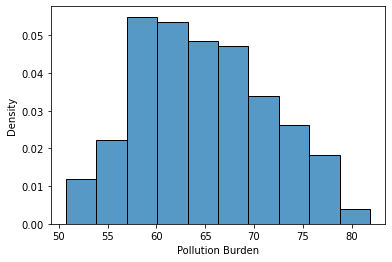

In [34]:
sns.histplot(highest_95_100, x='Pollution Burden', stat='density')

### NASA -  SoCAB Land Cover

nasa = rasterio.open('../data/NASA/SCLC11-Full.tif')

nasa_array = nasa.read(1)

pyplot.imshow(nasa_array, cmap='pink')